## Importing Libraries and Reading DataSet

In [5]:
# Importing the basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import os
#display all columns 
from IPython.display import display
pd.set_option('display.max_columns', None)
# ignore some plotnine junk warnings. TODO: check what is generating the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading the data
bank_transactions_data = pd.read_csv(r"bank_transactions.csv", delimiter=',')
df_original_len = len(bank_transactions_data)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(bank_transactions_data.shape[0], bank_transactions_data.shape[1]))

Original length of dataframe: 1048567
There are 1048567 rows and 9 columns in the dataset


In [7]:
bank_transactions_data.head()
bank_transactions_data.tail()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [8]:
bank_transactions_data[[ 'CustGender', 'CustLocation']].describe()

,CustGender,CustLocation
count,1047467,1048416
unique,3,9355
top,M,MUMBAI
freq,765530,103595


In [9]:
bank_transactions_data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [10]:
# To find out the time span of the data set
# Convert the 'TransactionDate' column to datetime 
bank_transactions_data['TransactionDate'] = pd.to_datetime(bank_transactions_data['TransactionDate'])

# Find the earliest and latest dates
earliest_date = bank_transactions_data['TransactionDate'].min()
latest_date = bank_transactions_data['TransactionDate'].max()

# Calculate the time span
time_span = latest_date - earliest_date

print(f"Earliest transaction date: {earliest_date}")
print(f"Latest transaction date: {latest_date}")
print(f"Time span of the data: {time_span}")

Earliest transaction date: 2016-01-08 00:00:00
Latest transaction date: 2016-12-09 00:00:00
Time span of the data: 336 days 00:00:00


## Cleaning Data

In [11]:
bank_transactions_data.info()

# Calculate the percentage of missing values for each column
missing_percentage = bank_transactions_data.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  object        
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB
TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustG

<font color='gold'>**TransactionID**</font>:

In [12]:
# Checking if the TransactionID's are unique
if (len(bank_transactions_data['TransactionID'].unique()) == len(bank_transactions_data)):
    print("TransactionID's are unique, no need to aggregate")
else:
    print("TransactionID's are not unique, need to aggregate")

TransactionID's are unique, no need to aggregate


In [13]:
# Dropping the TransactionID column since it is not going to be used in modeling and they are unique
#bank_transactions_data = bank_transactions_data.drop('TransactionID', axis=1)


<font color='gold'>**Missing Values**</font>:

We addressed missing values in the dataset with strategies tailored to each column's characteristics:

1. **CustomerDOB**: Dropped rows with missing values, as age is vital for our analysis and the missing percentage was low (0.32%).

2. **CustGender**: Filled missing values with the mode, given the minimal missing data (0.10%), ensuring gender distribution remains unaffected.

3. **CustLocation**: Also filled with the mode due to an insignificant percentage of missing values (0.01%), maintaining geographical consistency.

4. **CustAccountBalance**: Missing values were filled with the median to avoid skewing by outliers, suitable for a numerical variable with potential for skewed distribution.

These methods ensure data integrity, especially for crucial variables like age, and maintain the overall data distribution for reliable analysis.


In [14]:
# Filling missing values
# Drop rows where CustomerDOB is NaN
bank_transactions_data.dropna(subset=['CustomerDOB'], inplace=True)
# Impute missing data for gender with mode
bank_transactions_data['CustGender'].fillna(bank_transactions_data['CustGender'].mode()[0], inplace=True)
# Impute missing data for customer location with mode
bank_transactions_data['CustLocation'].fillna(bank_transactions_data['CustLocation'].mode()[0], inplace=True)
# Impute missing data for account balance with median
bank_transactions_data['CustAccountBalance'].fillna(bank_transactions_data['CustAccountBalance'].median(), inplace=True)

# Print the count of missing values for each column after cleaning
print(bank_transactions_data.isnull().sum())


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [15]:
# Check for duplicate rows
duplicate_rows = bank_transactions_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [16]:
## Show detailes data set
def check(bank_transactions_data):
    l=[]
    columns=bank_transactions_data.columns
    for col in columns:
        dtypes=bank_transactions_data[col].dtypes
        nunique=bank_transactions_data[col].nunique()
        sum_null=bank_transactions_data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(bank_transactions_data)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1045170,0
1,CustomerID,object,881893,0
2,CustomerDOB,object,17254,0
3,CustGender,object,3,0
4,CustLocation,object,9303,0
5,CustAccountBalance,float64,160853,0
6,TransactionDate,datetime64[ns],55,0
7,TransactionTime,int64,81885,0
8,TransactionAmount (INR),float64,92624,0


count    881893.000000
mean          1.185144
std           0.449771
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: CustomerID, dtype: float64


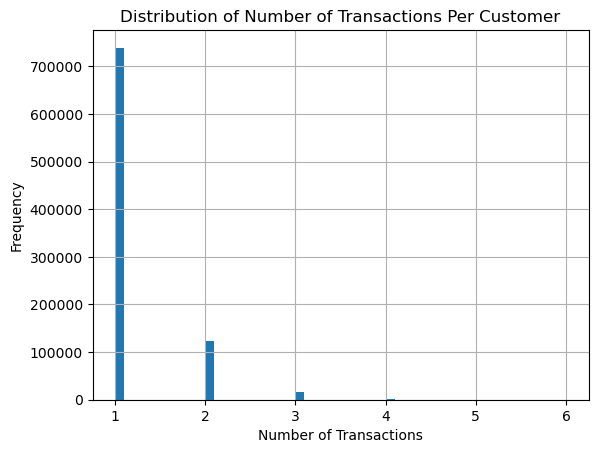

In [17]:
# Count the number of transactions for each customer (Aggregated feature)
transactions_per_customer = bank_transactions_data['CustomerID'].value_counts()

# Display summary statistics of the transactions per customer
print(transactions_per_customer.describe())

# Ploting number of transactions done by each customer
transactions_per_customer.hist(bins=50)
plt.title('Distribution of Number of Transactions Per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

Since in this dataset for majority of customers there is just one transaction record, we will not take this metric into account. 

<font color='gold'>**TransactionDate**</font>:

We extract day and month from Transaction date to check for any difference in transacation paterns over time and also create a new feature "DaysSinceLastTransaction" 

In [18]:
from datetime import datetime

# Extracting day, month, and year from TransactionDate
bank_transactions_data['TransactionDate'] = pd.to_datetime(bank_transactions_data['TransactionDate'], errors='coerce')
bank_transactions_data['TransactionDay'] = bank_transactions_data['TransactionDate'].dt.day
bank_transactions_data['TransactionMonth'] = bank_transactions_data['TransactionDate'].dt.month

1. Plot for Number of Transactions Based on Month

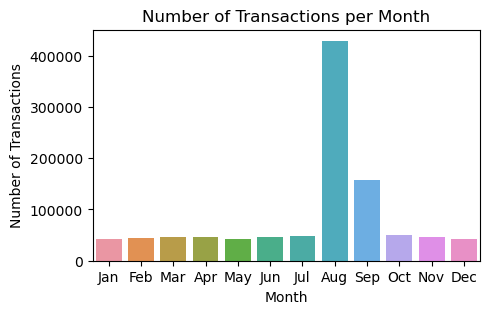

In [19]:
# Counting transactions per month
transactions_per_month = bank_transactions_data.groupby('TransactionMonth').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

2. Plot for Number of Transactions Based on Day of the Month

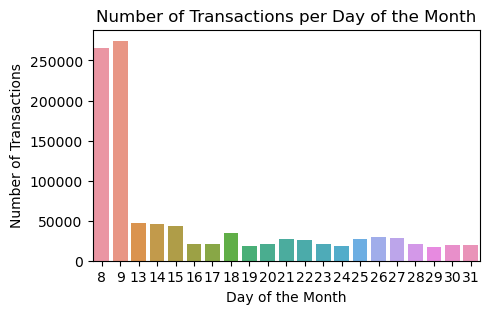

In [20]:
# Counting transactions per day of the month
transactions_per_day = bank_transactions_data.groupby('TransactionDay').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day of the Month')
plt.show()


3. General Plot Based on Date

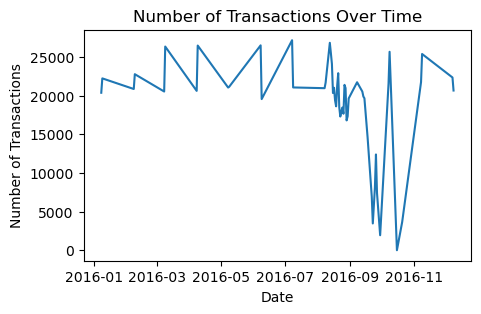

In [21]:
# Counting transactions per date
transactions_per_date = bank_transactions_data.groupby(bank_transactions_data['TransactionDate'].dt.date).size()

# Plotting
plt.figure(figsize=(5, 3))
transactions_per_date.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.show()


<font color='gold'>**TransactionTime**</font>:

Extracting hour from transaction time to check for any paterns over a day

In [22]:
# Function to extract hour from HHMMSS format
def extract_hour(time_int):
    time_str = str(time_int).zfill(6)  # Ensure the string has 6 digits
    hour = int(time_str[:2])  # Extract the first two characters and convert to int
    return hour

# Apply the function to extract the hour 
bank_transactions_data['TransactionHour'] = bank_transactions_data['TransactionTime'].apply(extract_hour)
# Drop Transaction time 
bank_transactions_data = bank_transactions_data.drop('TransactionTime', axis=1)


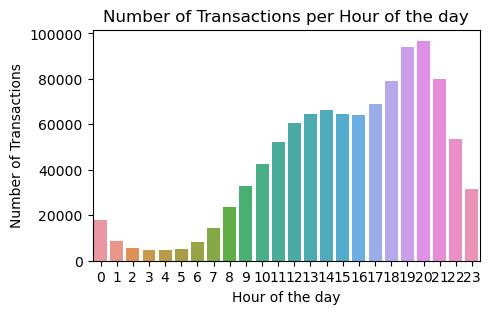

In [23]:
# Counting transactions per hour of the day
transactions_per_hour = bank_transactions_data.groupby('TransactionHour').size()

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=transactions_per_hour.index, y=transactions_per_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour of the day')
plt.show()

<font color='gold'>**CustomerDOB**</font>:

Calculating Age of customers 

In [24]:
# Convert CustomerDOB to datetime and calculate age
year_of_data = 2016
bank_transactions_data['CustomerDOB'] = pd.to_datetime(bank_transactions_data['CustomerDOB'], errors='coerce')
bank_transactions_data['Age'] = year_of_data - bank_transactions_data['CustomerDOB'].dt.year


In [25]:
bank_transactions_data = bank_transactions_data.drop('CustomerDOB', axis=1)

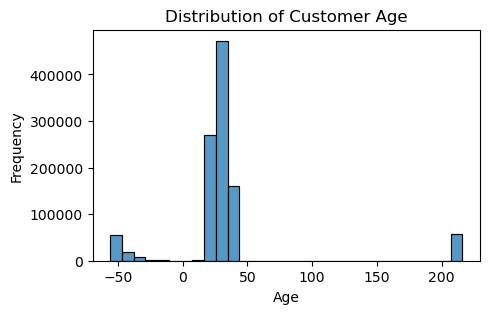

In [26]:
plt.figure(figsize=(5, 3))
sns.histplot(bank_transactions_data['Age'], bins=30, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

The age is negative because anyone can open a savings account on behalf of a child or grandchild

<font color='gold'>**Gender**</font>:

In [27]:
# Checking Gender column
bank_transactions_data.CustGender.value_counts()

M    763839
F    281330
T         1
Name: CustGender, dtype: int64

In [28]:
# Since there is just one T we will drop it
bank_transactions_data.drop(bank_transactions_data[bank_transactions_data['CustGender']=='T'].index,inplace=True)

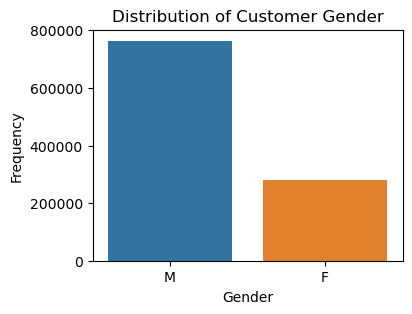

In [29]:
# Counting the frequency of each gender
gender_count = bank_transactions_data['CustGender'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Gender')
plt.show()

<font color='gold'>**CustLocation**</font>:

In [30]:
# Total number of unique cities
total_unique_cities = bank_transactions_data['CustLocation'].nunique()

# Counting transactions per city
transactions_per_city = bank_transactions_data['CustLocation'].value_counts()

# Identifying cities with fewer than 500 transactions
cities_with_less_than_500 = transactions_per_city[transactions_per_city < 500].index.tolist()

# Counting the number of such cities
number_of_cities_less_than_500 = len(cities_with_less_than_500)

# Calculating the percentage
percentage_of_cities_with_less_than_500 = (number_of_cities_less_than_500 / total_unique_cities) * 100

# Filtering the DataFrame to include only transactions in these cities
transactions_in_cities_less_than_500 = bank_transactions_data[bank_transactions_data['CustLocation'].isin(cities_with_less_than_500)]

# Counting the number of transactions in these cities
number_of_transactions_in_cities_less_than_500 = transactions_in_cities_less_than_500.shape[0]

print(f"Number of transactions in cities with fewer than 500 transactions: {number_of_transactions_in_cities_less_than_500}")
print(f"Number of unique cities for customer location: {total_unique_cities}")
print(f"Number of cities with fewer than 500 transactions: {number_of_cities_less_than_500}")
print(f"Percentage of cities with fewer than 500 transactions: {percentage_of_cities_with_less_than_500:.2f}%")

Number of transactions in cities with fewer than 500 transactions: 171417
Number of unique cities for customer location: 9303
Number of cities with fewer than 500 transactions: 9127
Percentage of cities with fewer than 500 transactions: 98.11%


Because the number of unique valuse are too many in customer location column and many of them are just different variations of other cities, we decided to replace the values of cities with less that 500 transaction with "other" to decrease the number of unique valuses 

In [31]:
# Replacing 'CustLocation' values for these cities with 'other'
bank_transactions_data['CustLocation'] = bank_transactions_data['CustLocation'].apply(lambda x: 'other' if x in cities_with_less_than_500 else x)
total_unique_cities_new = bank_transactions_data['CustLocation'].nunique()
print(total_unique_cities_new)

177


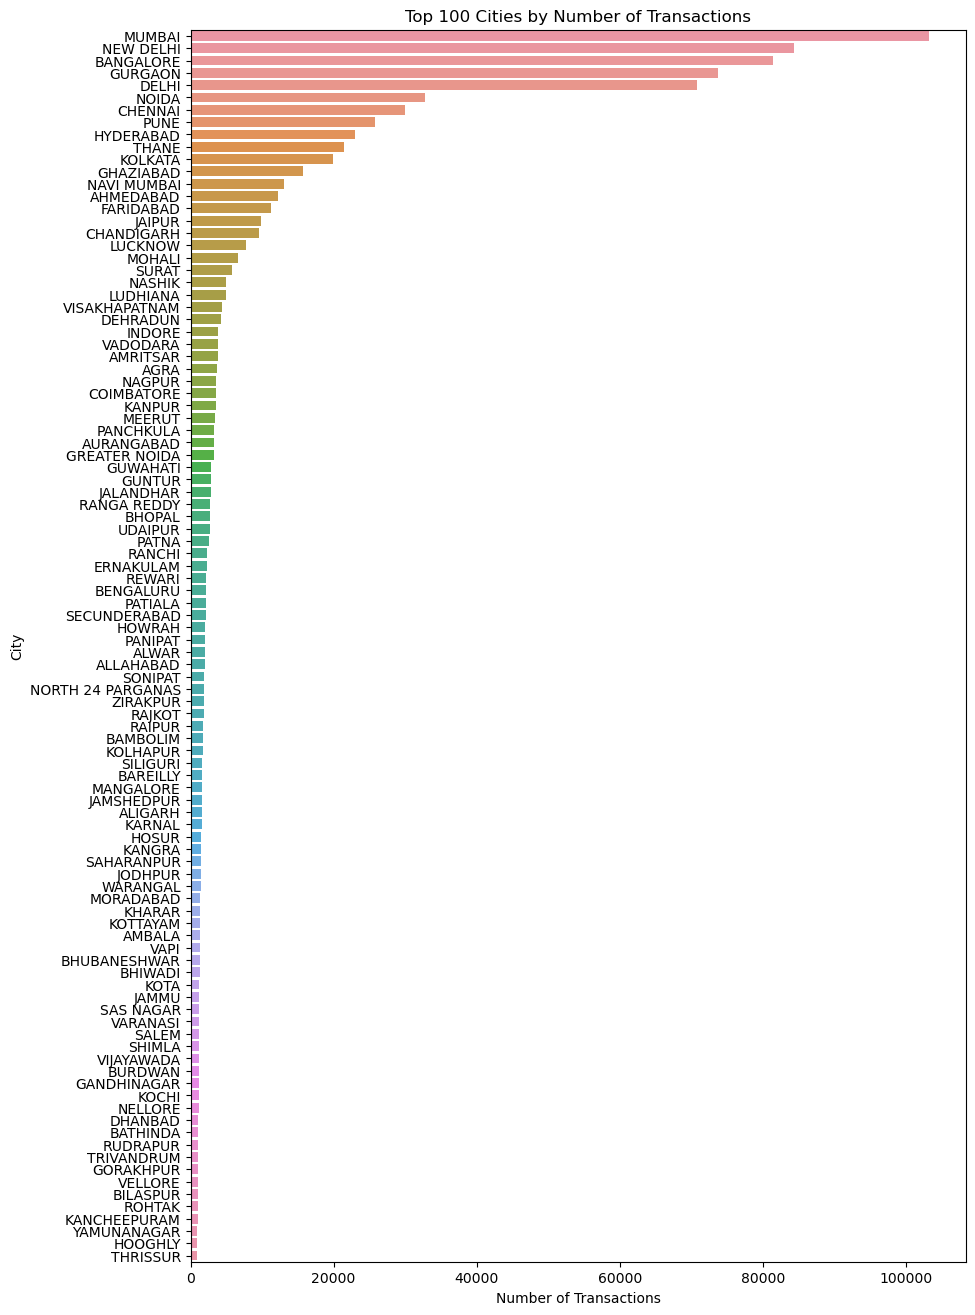

In [32]:
# Selecting the top 100 cities
top_20_cities = transactions_per_city.head(100)

# Plotting
plt.figure(figsize=(10, 16))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index)
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.title('Top 100 Cities by Number of Transactions')
plt.show()

<font color='gold'>**AccountBalance**</font>:

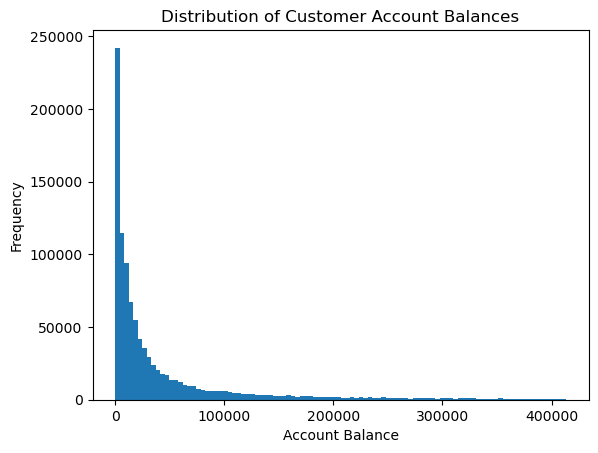

In [33]:
# ploting distribution of customers account balance
plt.hist(bank_transactions_data['CustAccountBalance'], bins=100, range=[0, bank_transactions_data['CustAccountBalance'].quantile(0.95)])
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

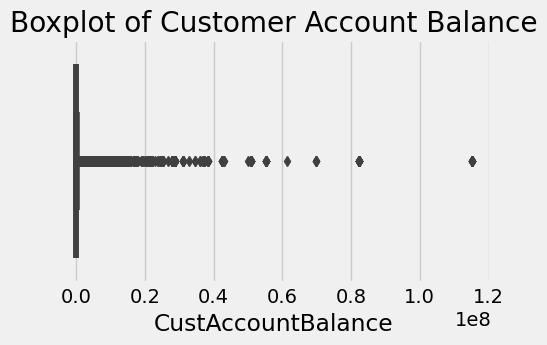

In [34]:
# Ploting customer account balance
# Setting the plot style
plt.style.use("fivethirtyeight")

# Creating a figure
plt.figure(figsize=(5, 3))  # Adjust the size as needed

# Plotting a boxplot for AverageAccountBalance
sns.boxplot(data=bank_transactions_data, x='CustAccountBalance')

plt.title('Boxplot of Customer Account Balance')
plt.show()

Because our data in customer account balance is highly skewed to right we use log transformation to make it more close to normal distribution

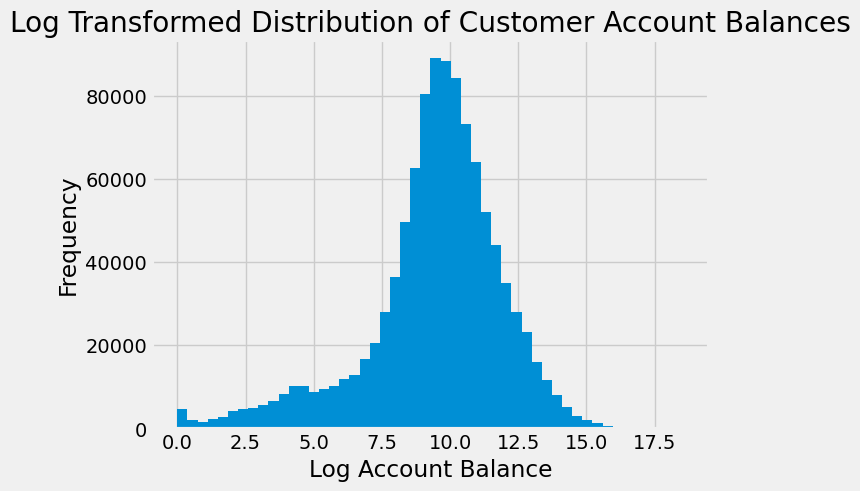

In [35]:
# Apply a log transformation
bank_transactions_data['Log_CustAccountBalance'] = np.log(bank_transactions_data['CustAccountBalance'] + 1)

plt.hist(bank_transactions_data['Log_CustAccountBalance'], bins=50)
plt.title('Log Transformed Distribution of Customer Account Balances')
plt.xlabel('Log Account Balance')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Average account balance for each customer
# Group by CustomerID and calculate the mean of the log-transformed account balances
average_log_balance_per_customer = bank_transactions_data.groupby('CustomerID')['Log_CustAccountBalance'].mean().rename('AverageLogAccountBalance')

# Merge this average log balance back into the main DataFrame
bank_transactions_data = bank_transactions_data.merge(average_log_balance_per_customer, on='CustomerID')


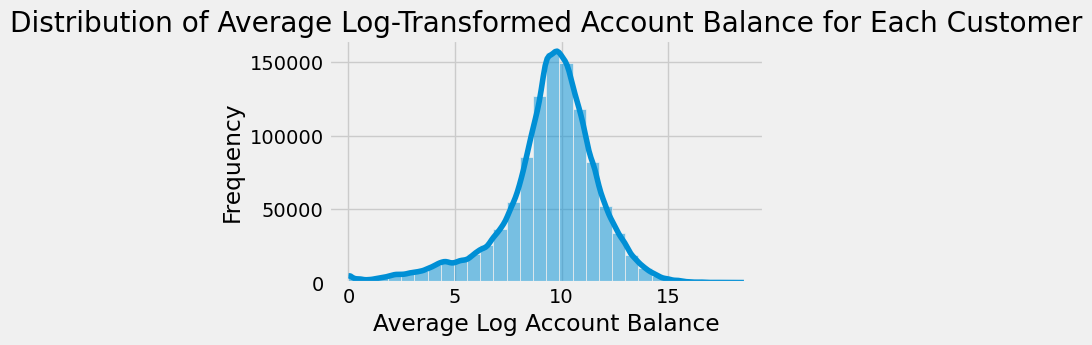

In [37]:
# Plotting the histogram of average log-transformed account balance
plt.figure(figsize=(5, 3))
sns.histplot(bank_transactions_data['AverageLogAccountBalance'], kde=True, bins=30)
plt.xlabel('Average Log Account Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Average Log-Transformed Account Balance for Each Customer')
plt.show()

<font color='gold'>**TransactionAmount**</font>:

In [38]:
# Renaming the 'TransactionAmount (INR)' column to 'TransactionAmount'
bank_transactions_data = bank_transactions_data.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'})


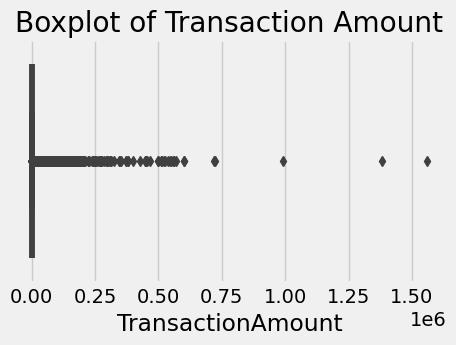

In [39]:
# Ploting Transaction Amount
# Setting the plot style
plt.style.use("fivethirtyeight")

# Creating a figure
plt.figure(figsize=(5, 3))  # Adjust the size as needed

# Plotting a boxplot for AverageAccountBalance
sns.boxplot(data=bank_transactions_data, x='TransactionAmount')

plt.title('Boxplot of Transaction Amount')
plt.show()

Same as customer account balance, we perform a log transformation on transaction amount

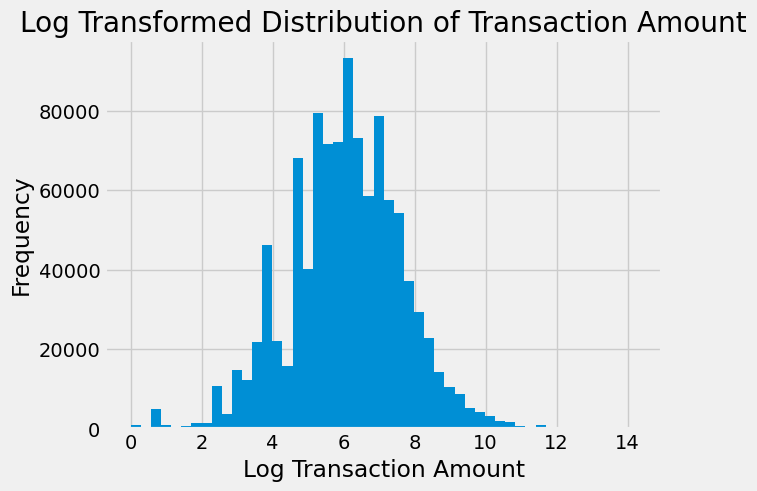

In [40]:
# Apply a log transformation
bank_transactions_data['Log_TransactionAmount'] = np.log(bank_transactions_data['TransactionAmount'] + 1)

plt.hist(bank_transactions_data['Log_TransactionAmount'], bins=50)
plt.title('Log Transformed Distribution of Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')
plt.show()

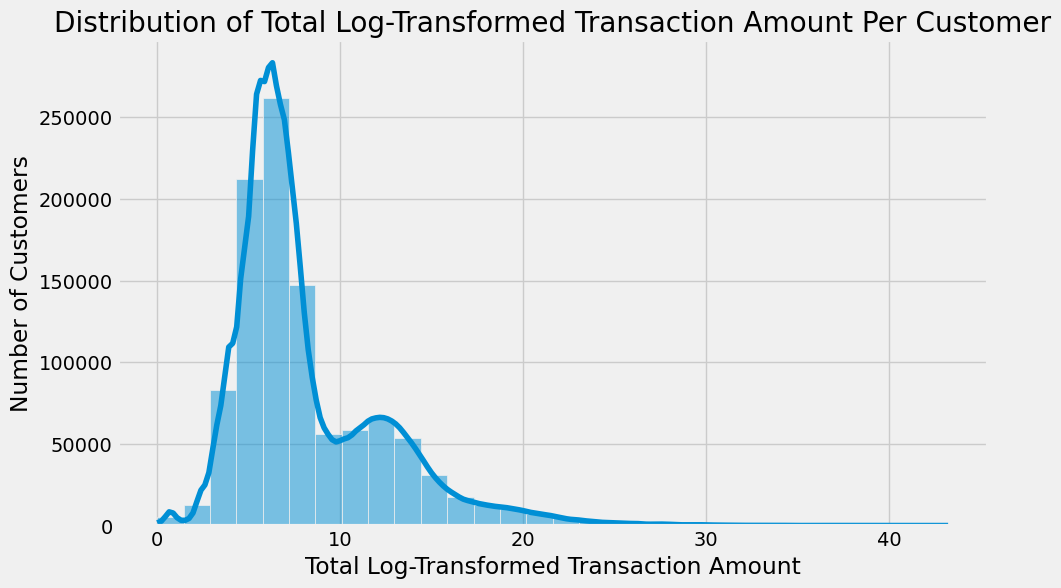

In [41]:
# Defining total amount of transactions done by each customer 
#  Summing the log-transformed transaction amount for each customer
total_log_transaction_per_customer = bank_transactions_data.groupby('CustomerID')['Log_TransactionAmount'].sum().rename('TotalLogTransactionAmount')

# Merge this total back into the main DataFrame
bank_transactions_data = bank_transactions_data.merge(total_log_transaction_per_customer, on='CustomerID', how='left')

# Plotting the histogram of total log-transformed transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(bank_transactions_data['TotalLogTransactionAmount'], bins=30, kde=True)
plt.xlabel('Total Log-Transformed Transaction Amount')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Log-Transformed Transaction Amount Per Customer')
plt.show()

# Feature Engineering

We have created some new features in EDA part as follow : 

- TransactionDay
- TransactionMonth
- TransactionHour
- Age
- Log_CustAccountBalance
- AverageLogAccountBalance
- Log_TransactionAmount
- TotalLogTransactionAmount

Log transformed features will be replaced with the primary features for customer account balance and transaction amount 

These Column will be droped from dataframe since we will not use them in modeling : 

- TransactionID
- CustAccountBalance
- TransactionAmount
- TransactionDate
- CustomerID


In [42]:
# Dropping the specified columns
columns_to_drop = ['TransactionID', 'CustAccountBalance', 'TransactionAmount', 'TransactionDate', 'CustomerID']
bank_transactions_data = bank_transactions_data.drop(columns=columns_to_drop, errors='ignore')

In [43]:
bank_transactions_data.head()

,CustGender,CustLocation,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount
0,F,JAMSHEDPUR,8,2,14,22,9.788080,9.788080,3.258097,3.258097
1,M,JHAJJAR,8,2,14,-41,7.728279,7.728279,10.239960,10.239960
2,F,MUMBAI,8,2,14,20,9.791183,9.791183,6.131226,6.131226
3,F,MUMBAI,8,2,14,43,13.672222,10.871061,7.630947,14.410186
4,M,MUMBAI,13,8,19,37,8.069899,10.871061,6.779240,14.410186


Encoding Categorical Columns : 

In [44]:
Gender = {'M': 0, 'F': 1}

bank_transactions_data.replace({"CustGender": Gender }, inplace = True)


In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Reshaping the column to a 2D array as OrdinalEncoder expects 2D inputs
locations = bank_transactions_data['CustLocation'].values.reshape(-1, 1)

# Creating the encoder instance
encoder = OrdinalEncoder()

# Fitting and transforming the 'CustLocation' column
bank_transactions_data['CustLocation_Encoded'] = encoder.fit_transform(locations)

bank_transactions_data.head()


,CustGender,CustLocation,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,CustLocation_Encoded
0,1,JAMSHEDPUR,8,2,14,22,9.788080,9.788080,3.258097,3.258097,77.0
1,0,JHAJJAR,8,2,14,-41,7.728279,7.728279,10.239960,10.239960,78.0
2,1,MUMBAI,8,2,14,20,9.791183,9.791183,6.131226,6.131226,113.0
3,1,MUMBAI,8,2,14,43,13.672222,10.871061,7.630947,14.410186,113.0
4,0,MUMBAI,13,8,19,37,8.069899,10.871061,6.779240,14.410186,113.0


In [46]:
# Drop the Custlocation column
bank_transactions_data.drop('CustLocation', axis=1, inplace=True)

# Covariance Matrix

Encoded columns from cutomre locataion are excluded due to high number of columns 

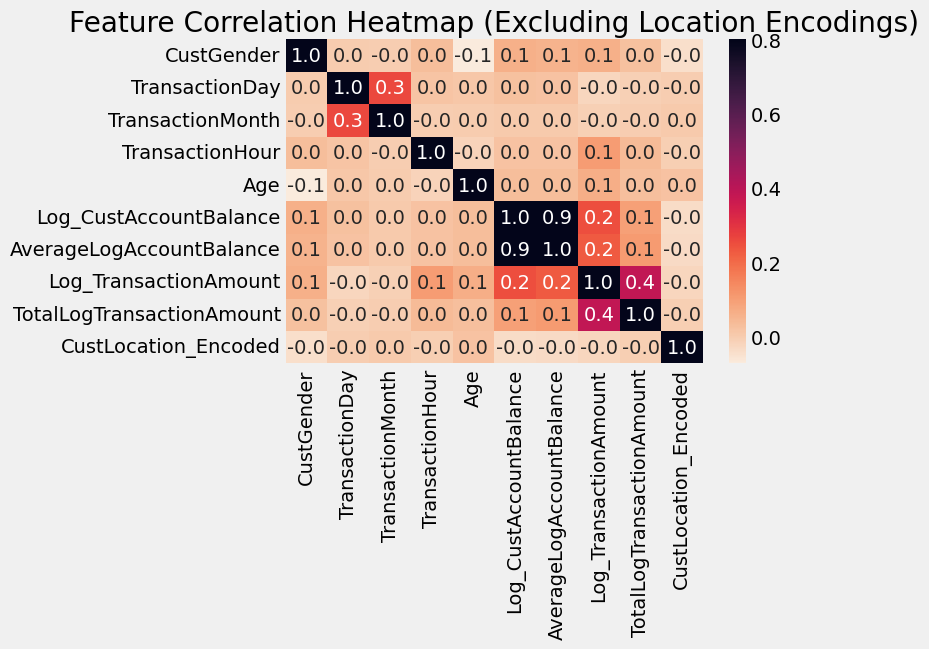

In [47]:
# Calculate the correlation matrix
correlation_matrix = bank_transactions_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))  # Adjust the size as needed
sns.heatmap(correlation_matrix, vmin=None, vmax=0.8, cmap='rocket_r', annot=True, fmt='.1f', linecolor='white', cbar=True)
plt.title('Feature Correlation Heatmap (Excluding Location Encodings)')
plt.show()

## PCA 

In [48]:
## feature scaling
from sklearn.preprocessing import StandardScaler
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to bank_transactions_data
scaler.fit(bank_transactions_data)
# Scaling bank_transactions_data used the fitting Standard scalar
bank_transactions_data_scaled = pd.DataFrame(scaler.transform(bank_transactions_data), columns=bank_transactions_data.columns)

In [49]:
bank_transactions_data_scaled.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,CustLocation_Encoded
0,1.647756,-0.882563,-2.034108,-0.275623,-0.226640,0.139624,0.151927,-1.740874,-1.194118,-0.367271
1,-0.606886,-0.882563,-2.034108,-0.275623,-1.511302,-0.685289,-0.745677,2.614528,0.492677,-0.348972
2,1.647756,-0.882563,-2.034108,-0.275623,-0.267423,0.140867,0.153280,0.051432,-0.499979,0.291498
3,1.647756,-0.882563,-2.034108,-0.275623,0.201581,1.695154,0.623861,0.986982,1.500190,0.291498
4,-0.606886,-0.197662,0.246074,0.699637,0.079232,-0.548477,0.623861,0.455674,1.500190,0.291498


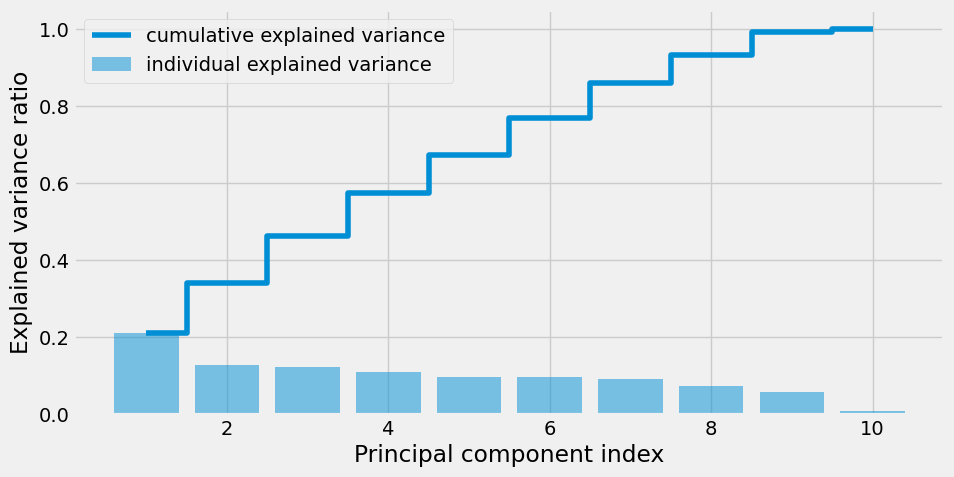

In [50]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(bank_transactions_data_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [51]:
#We would like to explain 90% variance  
var_exp_thres = 0.90
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(bank_transactions_data_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 90% variance is 8


## KMEAN MODEL

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer  # $ pip install yellowbrick for the Elbow method

##### 3a) Kmeans on the important Principal Components (PCs)

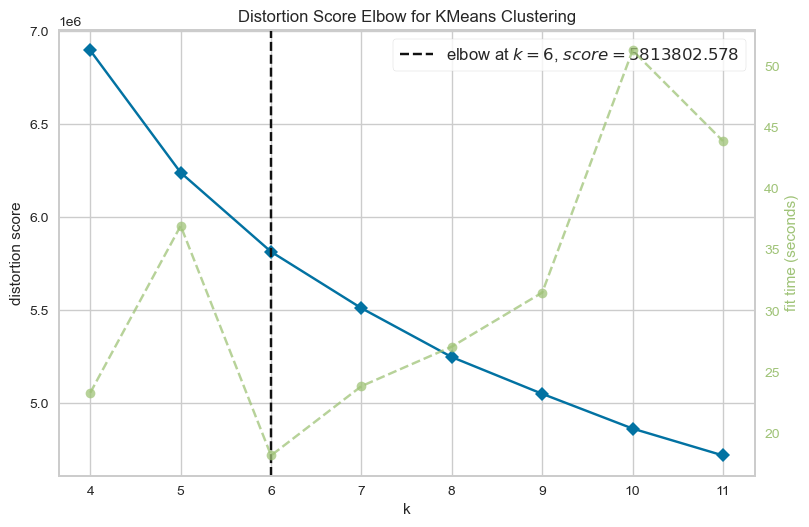

The best cluster number is: 6


In [53]:
## performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=3092) # you should remove the random_state in general. This is done for demonstration purposes.
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [54]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

In [55]:
# from sklearn import metrics
# sc = []
# dbi = []

# #metrics from imporant PC features method
# sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
# dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

# clusteting_methods = ['Kmean_on_PCs']

# # Creating a pandas dataframe
# d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
# df_metrics = pd.DataFrame(d)
# df_metrics.set_index('clusteting_methods', inplace = True)
# df_metrics

KeyboardInterrupt: 

this code took 251 minutes to finish

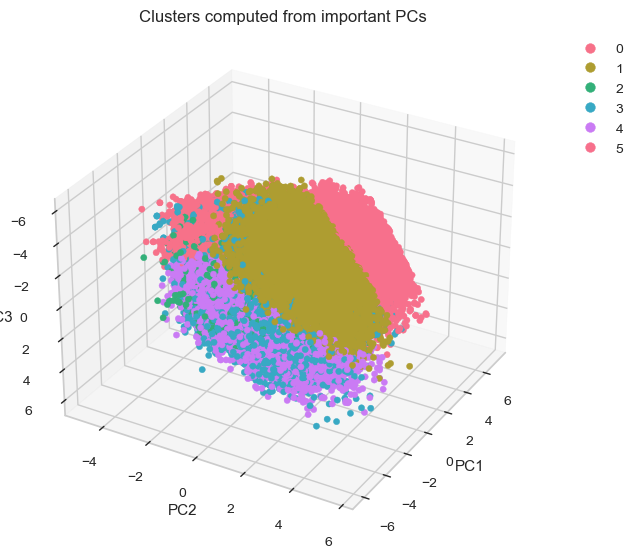

In [56]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


plt.show()

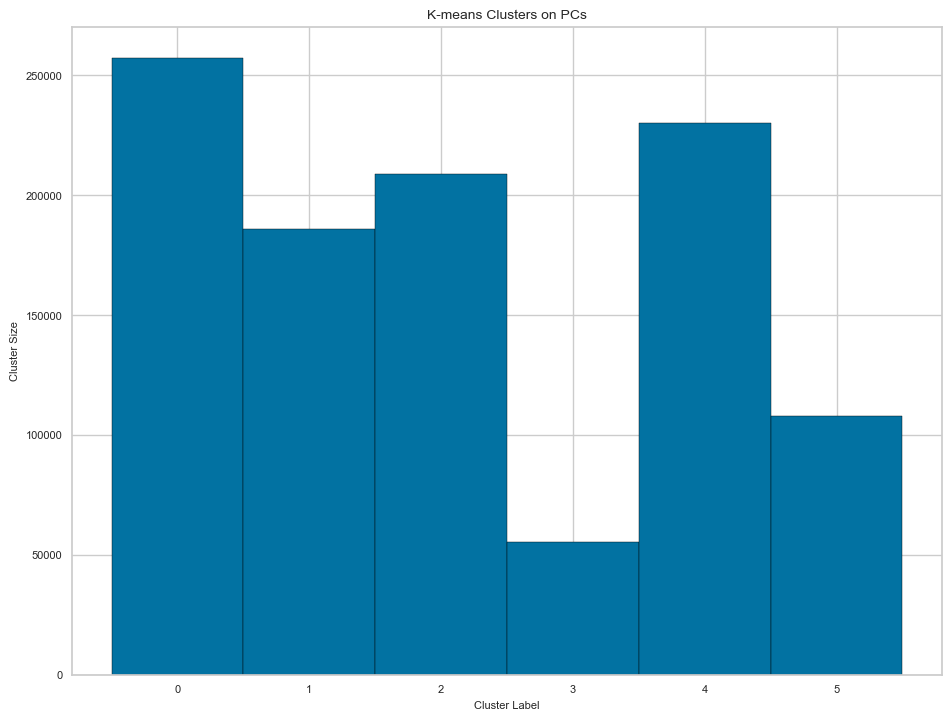

In [59]:
import matplotlib.pyplot as plt

num_clusters = len(set(Kmeans_clusters_PCs))  # Number of unique clusters

# Creating the histogram
plt.figure(figsize=(10, 8), dpi=100)
plt.hist(Kmeans_clusters_PCs, bins=range(num_clusters + 1), edgecolor='black', align='left')

plt.title('K-means Clusters on PCs', fontsize=10)
plt.xlabel('Cluster Label', fontsize=8)
plt.ylabel('Cluster Size', fontsize=8)
plt.xticks(range(num_clusters))  # Set x-ticks to match the number of clusters
plt.tick_params(axis='both', which='major', labelsize=8)

# Display the plot
plt.show()


## Cluster Interpretation

In [61]:
#adding the cluster column to the original dataset
bank_transactions_data['cluster'] = Kmeans_clusters_PCs
bank_transactions_data.head()

,CustGender,TransactionDay,TransactionMonth,TransactionHour,Age,Log_CustAccountBalance,AverageLogAccountBalance,Log_TransactionAmount,TotalLogTransactionAmount,CustLocation_Encoded,cluster
0,1,8,2,14,22,9.788080,9.788080,3.258097,3.258097,77.0,1
1,0,8,2,14,-41,7.728279,7.728279,10.239960,10.239960,78.0,1
2,1,8,2,14,20,9.791183,9.791183,6.131226,6.131226,113.0,1
3,1,8,2,14,43,13.672222,10.871061,7.630947,14.410186,113.0,1
4,0,13,8,19,37,8.069899,10.871061,6.779240,14.410186,113.0,4


## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

In [ ]:
# min_samples >= P+1, with P the number of features
min_samples = pca_comps.shape[1] + 1 

#DBSCAN model building 
dbscan = DBSCAN(eps = 0.5, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps)

print('dbscan has created clusters:', list(set(db_clusters)))